<a href="https://colab.research.google.com/github/holmon-alp/tashkent-house-pricing/blob/main/Copy_of_05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [2]:
%matplotlib inline

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [4]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


## Ma'lumotlarni tozalash
Yuqorida ko'rinib turibdiki ma'lumotlar turlari hisoblash uchun mos emas. Shuning uchun matnli (object) ma'lumotlarni songa(float) o'tkazib olamiz.

In [5]:
import re
pattern = re.compile("[-+]?[0-9]*\.?[0-9]+")

mask = df["price"].apply(lambda x : bool(pattern.match(x)))
cleaned_df = df[mask] # Yaroqsiz qiymatlarni tashlab yuboramiz
cleaned_df["price"] = cleaned_df.price.astype(np.float32) # ma'lumotlarni matndan raqamli ko'rinishga o'tkazamiz
mask = cleaned_df["size"].apply(lambda x : bool(pattern.match(x))) # floatga o'tkazib bo'lmaydigan ma'lumotlarni belgilab olamiz
cleaned_df = cleaned_df[mask] # floatga o'tkazib bo'lmaydigan ma'lumotlarni tashlab yuboramiz
cleaned_df["size"] = cleaned_df["size"].apply(np.float32) # matndan floatga o'tkazamiz

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float32
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   float32
dtypes: float32(2), int64(3), object(2)
memory usage: 408.2+ KB


<ipython-input-5-cf780133f192>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["price"] = cleaned_df.price.astype(np.float32) # ma'lumotlarni matndan raqamli ko'rinishga o'tkazamiz


In [6]:
# Noodatiy qiymatlarni tashlab yuboramiz
cleaned_df = cleaned_df[(cleaned_df.price <= 300000) & (cleaned_df["size"] <= 1000)]

In [7]:
cleaned_df.describe()

,rooms,size,level,max_levels,price
count,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000
mean,2.610826,72.368774,3.693440,6.017414,57210.652344
std,1.064734,35.327106,2.237631,2.601543,38374.796875
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66000.000000
max,10.000000,500.000000,19.000000,25.000000,300000.000000


In [8]:
cleaned_df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0


### **district**  ustunidagi qiymatlarni ko'ramiz

In [9]:
cleaned_df.district.value_counts()

Чиланзарский         1627
Мирзо-Улугбекский    1358
Учтепинский           873
Юнусабадский          869
Мирабадский           748
Яккасарайский         648
Яшнободский           466
Шайхантахурский       373
Олмазорский           263
Сергелийский          160
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

## Visual ko'rinishda ma'lumotlarni tahlil qilamiz

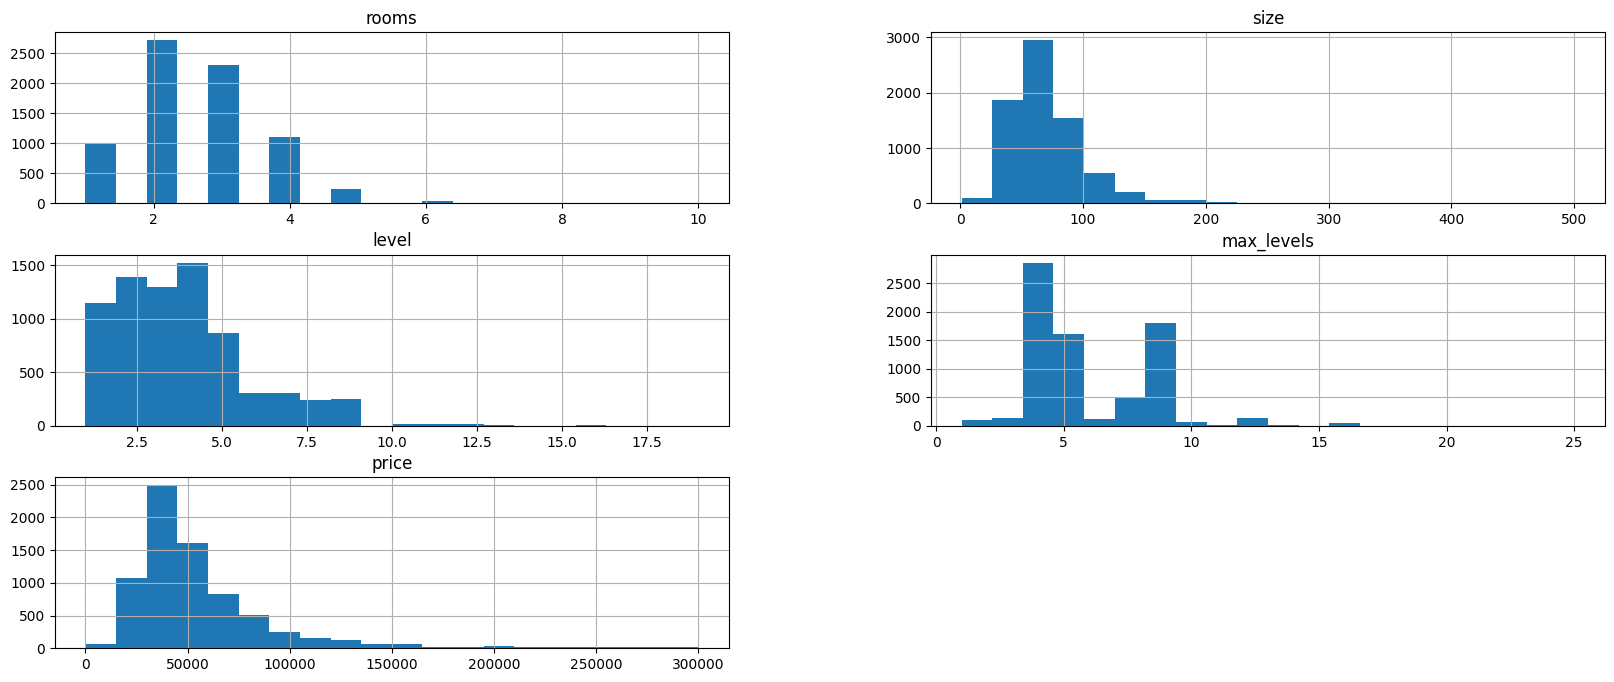

In [10]:
cleaned_df.hist(bins=20, figsize=(20, 8))
plt.show()

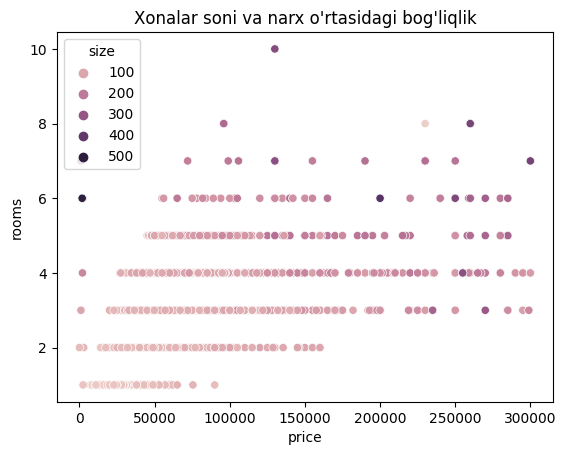

In [11]:
plt.title("Xonalar soni va narx o'rtasidagi bog'liqlik")
sns.scatterplot(data=cleaned_df, x="price", y="rooms", hue="size")
plt.show()

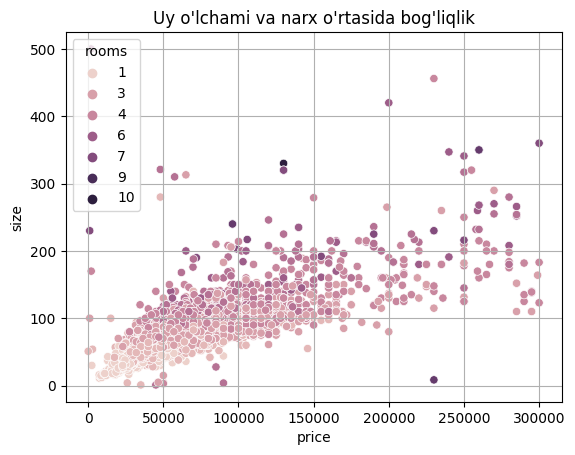

In [12]:
plt.title("Uy o'lchami va narx o'rtasida bog'liqlik")
sns.scatterplot(cleaned_df, x="price", y="size", hue="rooms")
plt.grid()
plt.show()

## Korrelyatsia

In [13]:
data_num = cleaned_df.drop(["location", "district"], axis=1)
data_num.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.779103,0.135954,0.177618,0.583604
size,0.779103,1.000000,0.157813,0.268913,0.774178
level,0.135954,0.157813,1.000000,0.593774,0.065743
max_levels,0.177618,0.268913,0.593774,1.000000,0.238465
price,0.583604,0.774178,0.065743,0.238465,1.000000


Bundan ko'rinib turibdiki uy o'lchami va xonalar soni uy narxiga ko'proq tasir qilmoqda

## Datasetni train va test setlarga ajratib olamiz


In [14]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(cleaned_df, cleaned_df["district"]):
  train_set = cleaned_df.iloc[train_index]
  test_set = cleaned_df.iloc[test_index]

print(
    len(train_set["district"].unique()),
    len(test_set["district"].unique())
)

# train_set, test_set = train_test_split(cleaned_df, test_size=0.2, random_state=13)
# first_test_data = train_set.copy()
# first_test_data.head()

12 12


In [15]:
train_set.shape

(5926, 7)

In [16]:
test_set.shape

(1482, 7)

#### Train datani model tayyorlashga qulay qilib shakllantiramiz

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_cols = ["rooms", "size", "level", "max_levels"]
cat_cols = ["district"]

data_pipeline = ColumnTransformer(
    [
        ("nums", MinMaxScaler(), num_cols),
        ("cats", OneHotEncoder(), cat_cols)
    ]
)

prepared_data = data_pipeline.fit_transform(
    train_set.drop(["location", "price"], axis=1)
    )
y_label = train_set["price"].copy()

prepared_data[0, :]

array([0.33333333, 0.19839679, 0.22222222, 0.16666667, 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

## Model tayyorlashni boshlaymiz

In [18]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X=prepared_data, y=y_label)
prepared_data[0, :]

array([0.33333333, 0.19839679, 0.22222222, 0.16666667, 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

### Modelning birinchi test bosqichi

In [19]:

def get_sample(data, lim=500):
  test = data.sample(lim)
  while len(test["district"].unique()) != 12:
    test = data.sample(lim)
  return test

In [20]:
# first_test = train_set.sample(500)
first_test = get_sample(train_set)
y_test = y_label.loc[first_test.index]

first_test_data = data_pipeline.fit_transform(
    first_test.drop(["location", "price"], axis=1)
    )
predicted = linear_model.predict(first_test_data)
# test_set["district"].unique().__len__()

In [21]:
pd.DataFrame(
    {
        "real": y_test,
        "predicted": np.floor(predicted)
    }
).head(10)

,real,predicted
3644,135000.0,137213.0
7360,43000.0,40458.0
6091,110000.0,183281.0
4045,30000.0,50957.0
4591,23000.0,54644.0
1284,50670.0,79631.0
6812,44000.0,45032.0
670,42000.0,60177.0
1221,37000.0,55468.0
6389,48000.0,41409.0


### MSE test

In [22]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, predicted)

lin = np.sqrt(lin_mse)
lin

32144.501567066163

### Seconds main test

In [28]:


second_test = get_sample(test_set)
y_test = second_test["price"]
prepared_to_test = data_pipeline.fit_transform(
    second_test.drop(["location", "price"], axis=1)
)
predicted = linear_model.predict(prepared_to_test)

In [29]:
pd.DataFrame({
    "real price": y_test,
    "predicted":  predicted
}).head(10)

,real price,predicted
6010,28423.0,33024.993026
1542,70000.0,76682.884017
6438,45000.0,80161.998706
6345,23500.0,24310.912432
3418,65000.0,161604.938717
7372,40000.0,53652.090869
6126,43500.0,72160.341036
2530,34500.0,40518.229739
151,36500.0,73493.695191
272,67000.0,101687.373978


### Second MSE test

In [31]:
s_lim_mse = mean_squared_error(y_test, predicted)

np.sqrt(s_lim_mse)

33526.75808023583

## Birinchi model qoniqarsiz natija berdi, ikkinchi modelni sinab ko'ramiz

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF_model.fit(X=prepared_data, y=y_label)



RandomForestRegressor()

In [34]:
r_first_test = get_sample(train_set)
y_test = r_first_test["price"].copy()

r_prepared_test = data_pipeline.fit_transform(
    r_first_test.drop(["location", "price"], axis=1)
)
r_prepared_test[0, :]

array([0.        , 0.06921241, 0.        , 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [35]:
r_predicted = RF_model.predict(r_prepared_test)

pd.DataFrame({
    "real price": y_test,
    "predicted": r_predicted
}).head(10)

,real price,predicted
5627,32000.0,27063.833333
4705,65000.0,78723.500000
4142,132000.0,127612.990000
1963,132000.0,95046.500000
3522,55710.0,41823.843333
1867,39500.0,35570.473333
5096,33000.0,26411.128462
2611,190000.0,121143.310000
3316,54000.0,62918.483905
5545,35200.0,37143.305333


## RandomForestRegressor MSE test

In [36]:
r_lim_mse = mean_squared_error(y_test, r_predicted)
np.sqrt(r_lim_mse)

26013.79658575151

### RandomForestRegressor modelining bashorati nisbatan to'g'riroq natija berdi.